In [1]:
import pandas as pd
df = pd.read_csv("disney_plus_titles.csv")
print(df)

     show_id     type                                             title  \
0         s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1         s2    Movie                            Ernest Saves Christmas   
2         s3    Movie                      Ice Age: A Mammoth Christmas   
3         s4    Movie                        The Queen Family Singalong   
4         s5  TV Show                             The Beatles: Get Back   
...      ...      ...                                               ...   
1445   s1446    Movie                          X-Men Origins: Wolverine   
1446   s1447    Movie    Night at the Museum: Battle of the Smithsonian   
1447   s1448    Movie                                   Eddie the Eagle   
1448   s1449    Movie                              Bend It Like Beckham   
1449   s1450    Movie             Captain Sparky vs. The Flying Saucers   

                               director  \
0     Alonso Ramirez Ramos, Dave Wasson   
1            

In [2]:
print(df.shape)

(1450, 12)


In [3]:
print(df['director'].isnull())

0       False
1       False
2       False
3       False
4        True
        ...  
1445    False
1446    False
1447    False
1448    False
1449    False
Name: director, Length: 1450, dtype: bool


In [5]:
df['director']=df['director'].fillna("Unknow",inplace = True)
print(df['director'])

0       None
1       None
2       None
3       None
4       None
        ... 
1445    None
1446    None
1447    None
1448    None
1449    None
Name: director, Length: 1450, dtype: object


In [27]:
df['cast']=df['cast'].fillna("Not Available")
df['country']= df['country'].fillna("United States")
df['rating'] = df['rating'].dropna()
print(df['cast'])
print(df['country'])
print(df['rating'])

0       Not Available
1       Not Available
2       Not Available
3       Not Available
4       Not Available
            ...      
1445    Not Available
1446    Not Available
1447    Not Available
1448    Not Available
1449    Not Available
Name: cast, Length: 1450, dtype: object
0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
1445    United States
1446    United States
1447    United States
1448    United States
1449    United States
Name: country, Length: 1450, dtype: object
0        TV-G
1          PG
2        TV-G
3       TV-PG
4         NaN
        ...  
1445    PG-13
1446       PG
1447    PG-13
1448    PG-13
1449     TV-G
Name: rating, Length: 1450, dtype: object


In [11]:
df.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,None,Not Available,United States,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,None,Not Available,United States,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,None,Not Available,United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,None,Not Available,United States,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,None,Not Available,United States,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,None,Not Available,United States,"June 4, 2021",2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,None,Not Available,United States,"April 2, 2021",2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,None,Not Available,United States,"December 18, 2020",2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,None,Not Available,United States,"September 18, 2020",2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...


In [16]:
# outleris for movies
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_int'] = df_movies['duration'].str.replace(" min","").astype(float)

Q1 = df_movies['duration_int'].quantile(0.25)
Q3 = df_movies['duration_int'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

outliers = df_movies[(df_movies['duration_int'] < lower) | (df_movies['duration_int'] > upper)]
print(outliers[['title','duration','duration_int']])

54.0
-37.0
179.0
                                  title duration  duration_int
330           Arendelle Castle Yule Log  180 min         180.0
333                     Dory's Reef Cam  182 min         182.0
1039  Marvel Studios' Avengers: Endgame  183 min         183.0


In [17]:
df_shows = df[df['type'] == 'TV Show'].copy()
df_shows['duration_int'] = df_shows['duration'].str.replace(" Season","").str.replace("s","").astype(float)

Q1 = df_shows['duration_int'].quantile(0.25)
Q3 = df_shows['duration_int'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

outliers = df_shows[(df_shows['duration_int'] < lower) | (df_shows['duration_int'] > upper)]
print(outliers[['title','duration','duration_int']])

1.0
-0.5
3.5
                                       title    duration  duration_int
13                     Dr. Oakley, Yukon Vet  10 Seasons          10.0
58                                  PJ Masks   5 Seasons           5.0
75                          Drain the Oceans   4 Seasons           4.0
89                          Rolie Polie Olie   5 Seasons           5.0
92                              The Simpsons  32 Seasons          32.0
106                          Life Below Zero  16 Seasons          16.0
115                   The Incredible Dr. Pol  19 Seasons          19.0
125                 Dr. K's Exotic Animal ER   9 Seasons           9.0
179                       When Sharks Attack   7 Seasons           7.0
184                      Disney Raven's Home   4 Seasons           4.0
196                           Puppy Dog Pals   4 Seasons           4.0
216                              Wicked Tuna  10 Seasons          10.0
219                          Ice Road Rescue   5 Seasons        

In [18]:
#handelling outliers for movies
outliers = df_movies[(df_movies['duration_int'] >= lower) & (df_movies['duration_int'] <= upper)]
print(outliers[['title','duration','duration_int']])

#handeling outliers for TV shows
outliers = df_shows[(df_shows['duration_int'] >= lower) & (df_shows['duration_int'] <= upper)]
print(outliers[['title','duration','duration_int']])

                                      title duration  duration_int
14                    America the Beautiful    2 min           2.0
15                                  Baymax!    1 min           1.0
25           Limitless with Chris Hemsworth    2 min           2.0
27                           Obi-Wan Kenobi    1 min           1.0
37     The Proud Family: Louder and Prouder    1 min           1.0
41                                   Willow    3 min           3.0
353                From Our Family to Yours    3 min           3.0
650           Cars Toon: Rescue Squad Mater    3 min           3.0
651                     Cars Toon: Spinning    2 min           2.0
655                      Cars Toons: Bugged    2 min           2.0
705                 Happy Birthday, Mickey!    2 min           2.0
781                      Cars Toon: Hiccups    3 min           3.0
1027                               Luxo Jr.    2 min           2.0
1240     The Adventures of André & Wally B.    2 min          

In [20]:
print(df.head())



  show_id     type                                             title director  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special     None   
1      s2    Movie                            Ernest Saves Christmas     None   
2      s3    Movie                      Ice Age: A Mammoth Christmas     None   
3      s4    Movie                        The Queen Family Singalong     None   
4      s5  TV Show                             The Beatles: Get Back     None   

            cast        country         date_added  release_year rating  \
0  Not Available  United States  November 26, 2021          2016   TV-G   
1  Not Available  United States  November 26, 2021          1988     PG   
2  Not Available  United States  November 26, 2021          2011   TV-G   
3  Not Available  United States  November 26, 2021          2021  TV-PG   
4  Not Available  United States  November 25, 2021          2021    NaN   

   duration                      listed_in  \
0    23 min     

In [81]:
# Movies
df_movies = df[df['type'] == 'Movie'].copy()
df_movies['duration_int'] = df_movies['duration'].str.replace(" min","").astype(float)

# TV Shows
df_shows = df[df['type'] == 'TV Show'].copy()
df_shows['duration_int'] = df_shows['duration'].str.replace(" Season","").str.replace("s","").astype(float)

# Merge back
df_clean = pd.concat([df_movies, df_shows])

# Map rating categories to numbers
rating_map = {rating: i for i, rating in enumerate(df_clean['rating'].dropna().unique())}
df_clean['rating_num'] = df_clean['rating'].map(rating_map)


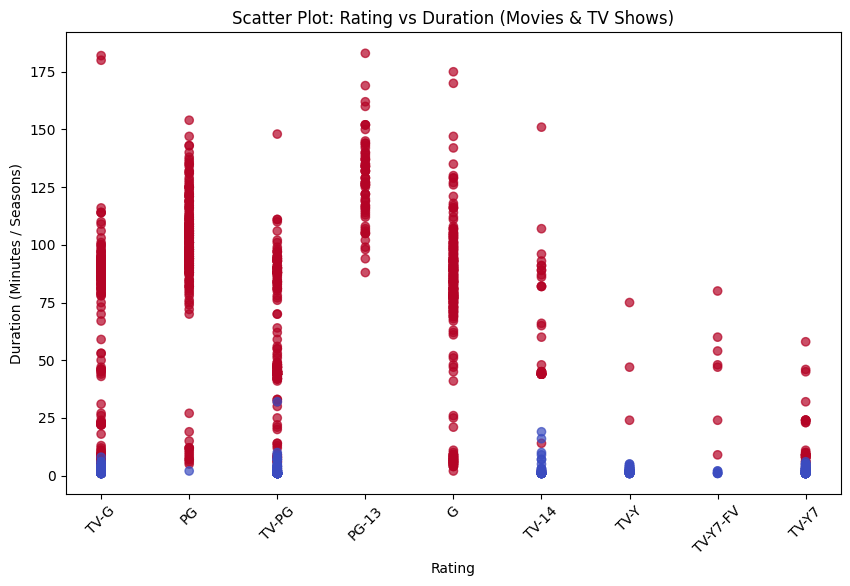

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(
    df_clean['rating_num'], 
    df_clean['duration_int'], 
    alpha=0.7,
    c=(df_clean['type']=='Movie'),  # colors: Movie=True, TV Show=False
    cmap='coolwarm'
)

plt.xticks(list(rating_map.values()), list(rating_map.keys()), rotation=45)
plt.xlabel("Rating")
plt.ylabel("Duration (Minutes / Seasons)")
plt.title("Scatter Plot: Rating vs Duration (Movies & TV Shows)")
plt.show()


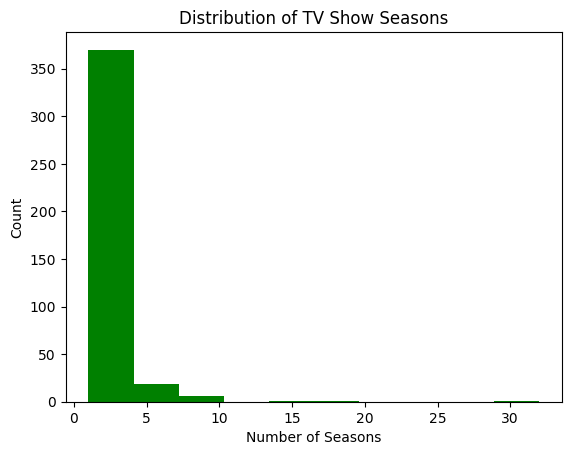

In [73]:
plt.hist(df_shows['duration_int'], bins=10, color='g')
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.title("Distribution of TV Show Seasons")
plt.show()

In [37]:
print(df)

     show_id     type                                             title  \
0         s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1         s2    Movie                            Ernest Saves Christmas   
2         s3    Movie                      Ice Age: A Mammoth Christmas   
3         s4    Movie                        The Queen Family Singalong   
4         s5  TV Show                             The Beatles: Get Back   
...      ...      ...                                               ...   
1445   s1446    Movie                          X-Men Origins: Wolverine   
1446   s1447    Movie    Night at the Museum: Battle of the Smithsonian   
1447   s1448    Movie                                   Eddie the Eagle   
1448   s1449    Movie                              Bend It Like Beckham   
1449   s1450    Movie             Captain Sparky vs. The Flying Saucers   

     director           cast        country          date_added  release_year  \
0        None  Not

In [42]:
counts = df['type'].value_counts()

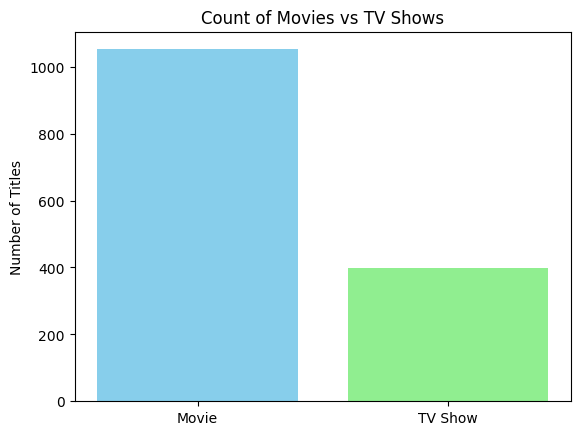

In [93]:
plt.bar(counts.index, counts.values, color=['skyblue', 'lightgreen'])
plt.title("Count of Movies vs TV Shows")
plt.ylabel("Number of Titles")
plt.show()

In [46]:
rating_counts = df['rating'].value_counts()

In [ ]:
plt.bar(rating_counts.index, rating_counts.values, color='orange')
plt.xticks(rotation=45)
plt.title("Count of Titles by Rating")
plt.ylabel("Number of Titles")
plt.show()

In [55]:
df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      0 non-null      object
 4   cast          1450 non-null   object
 5   country       1450 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 73.7+ KB


,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [52]:
df_clean = df.copy()
print(df_clean)

     show_id     type                                             title  \
0         s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1         s2    Movie                            Ernest Saves Christmas   
2         s3    Movie                      Ice Age: A Mammoth Christmas   
3         s4    Movie                        The Queen Family Singalong   
4         s5  TV Show                             The Beatles: Get Back   
...      ...      ...                                               ...   
1445   s1446    Movie                          X-Men Origins: Wolverine   
1446   s1447    Movie    Night at the Museum: Battle of the Smithsonian   
1447   s1448    Movie                                   Eddie the Eagle   
1448   s1449    Movie                              Bend It Like Beckham   
1449   s1450    Movie             Captain Sparky vs. The Flying Saucers   

     director           cast        country          date_added  release_year  \
0        None  Not

In [58]:
print("Movie durations (minutes):")
print("Min:", df_clean[df_clean['type']=='Movie']['duration'].min())
print("Max:", df_clean[df_clean['type']=='Movie']['duration'].max())

print("\nTV Show durations (seasons):")
print("Min:", df_clean[df_clean['type']=='TV Show']['duration'].min())
print("Max:", df_clean[df_clean['type']=='TV Show']['duration'].max())

Movie durations (minutes):
Min: 1 min
Max: 99 min

TV Show durations (seasons):
Min: 1 Season
Max: 9 Seasons


In [65]:
# Split 'listed_in' by comma, then flatten into one Series
all_genres = df_clean['listed_in'].str.split(', ').explode()

# Count frequency of each genre
genre_counts = all_genres.value_counts()
print(genre_counts)

listed_in
Family                     632
Animation                  542
Comedy                     526
Action-Adventure           452
Animals & Nature           208
Coming of Age              205
Fantasy                    192
Documentary                174
Kids                       141
Drama                      134
Docuseries                 122
Science Fiction             91
Historical                  53
Music                       48
Musical                     44
Sports                      43
Biographical                41
Buddy                       40
Anthology                   28
Reality                     26
Romance                     20
Superhero                   19
Crime                       16
Variety                     12
Mystery                     12
Game Show / Competition     10
Survival                     9
Parody                       9
Lifestyle                    8
Western                      7
Concert Film                 7
Medical                      

In [60]:
top_genres = genre_counts.head(10)

In [61]:
print(top_genres)

listed_in
Family              632
Animation           542
Comedy              526
Action-Adventure    452
Animals & Nature    208
Coming of Age       205
Fantasy             192
Documentary         174
Kids                141
Drama               134
Name: count, dtype: int64


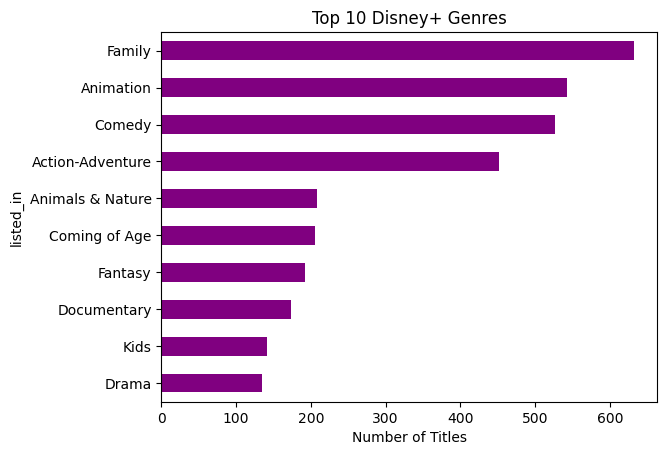

In [62]:
top_genres.plot(kind='barh', color='purple')  # horizontal bar is easier to read
plt.xlabel("Number of Titles")
plt.title("Top 10 Disney+ Genres")
plt.gca().invert_yaxis()  # optional: largest on top
plt.show()

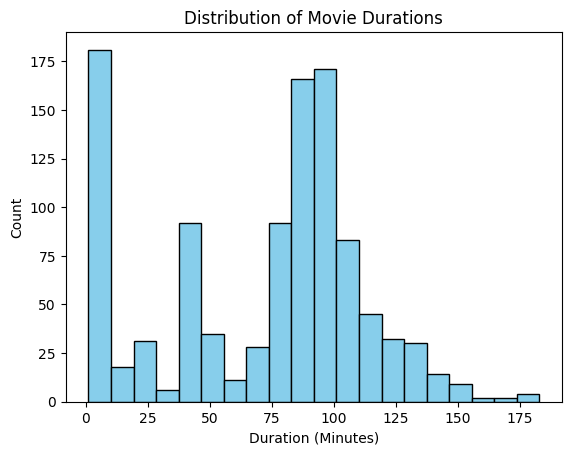

In [85]:
#movies hist graph
df_movies = df_clean[df_clean['type']=='Movie']
plt.hist(df_movies['duration_int'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

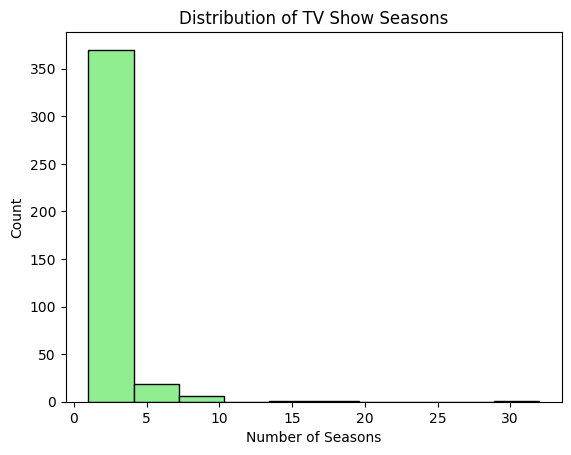

In [84]:
df_shows = df_clean[df_clean['type']=='TV Show']
plt.hist(df_shows['duration_int'], bins=10, color='lightgreen', edgecolor='black')
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

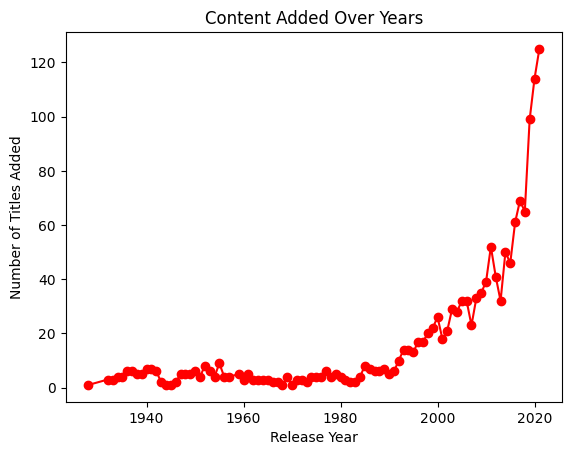

In [86]:
df_clean['release_year'] = df_clean['release_year'].astype(int)
year_counts = df_clean['release_year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o', color='red')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles Added")
plt.title("Content Added Over Years")
plt.show()

In [89]:
# Split by comma, remove extra spaces
countries_list = df_clean['country'].str.split(", ").explode()
country_counts = countries_list.value_counts()

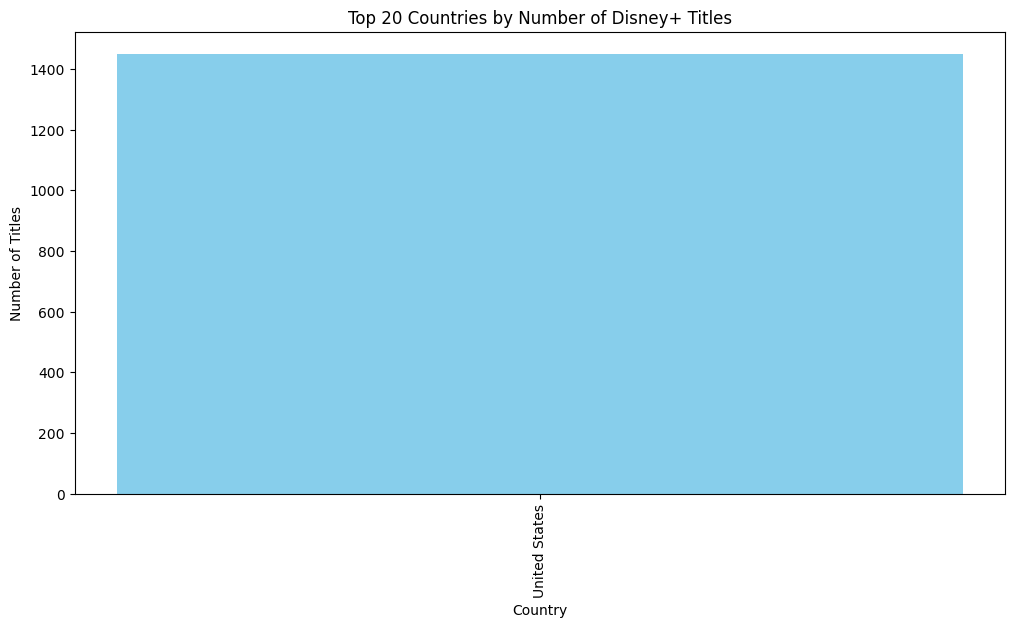

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(country_counts.index[:20], country_counts.values[:20], color='skyblue')  # Top 20 countries
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 20 Countries by Number of Disney+ Titles")
plt.show()


In [91]:
print(df_clean)

     show_id     type                                             title  \
0         s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1         s2    Movie                            Ernest Saves Christmas   
2         s3    Movie                      Ice Age: A Mammoth Christmas   
3         s4    Movie                        The Queen Family Singalong   
5         s6    Movie                                 Becoming Cousteau   
...      ...      ...                                               ...   
1417   s1418  TV Show                                  X-Men: Evolution   
1434   s1435  TV Show                                         Smart Guy   
1439   s1440  TV Show                              Disney Kirby Buckets   
1440   s1441  TV Show                                    Disney Mech-X4   
1441   s1442  TV Show                                Imagination Movers   

     director           cast        country         date_added  release_year  \
0        None  Not 